In [1]:
!python --version

Python 3.10.14


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pwd

/home/user/energygpt/chronos


In [4]:
datasets = ['BDG-2']

In [5]:
def load_results(datasets, result_type):
    results = []
    for dataset in datasets:
        print(dataset)
        files = glob.glob(f'/home/user/energygpt/chronos/results/{dataset}/*{result_type}*.csv')
        print(files)
        b_count = 0
        for f in files:            
            df = pd.read_csv(f)
            print(f, df.shape)
            #df = df[df.NRMSE <=1]
            #print(f, df.shape, ' After filtering')
            df.insert(0, 'dataset', dataset)
            df.insert(0, 'result_type', result_type)
            df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
            results.append(df)                
            b_count += df.shape[0]
        print(dataset, b_count, '\n')
            
    results_df = pd.concat(results)
    return results_df

In [6]:
#result_type = 'finetuned_agg_metrics'
result_type = 'agg_metrics'
test_agg = load_results(datasets, result_type)
print(test_agg.shape)

# result_type = 'finetuned_agg_metrics'
# finetuned_agg = load_results(datasets, result_type)
# print(finetuned_agg.shape)

BDG-2
['/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Fox_clean=2016.csv', '/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Panther_clean=2017.csv', '/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Bear_clean=2016.csv', '/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Bear_clean=2017.csv', '/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Rat_clean=2017.csv', '/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Rat_clean=2016.csv', '/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Fox_clean=2017.csv']
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Fox_clean=2016.csv (132, 9)
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Panther_clean=2017.csv (105, 9)
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Bear_clean=2016.csv (78, 9)
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Bear_clean=2017.csv (91, 9)
/home/user/energygpt/chronos/results/BDG-2/agg_metrics_Rat_clean=2017.csv (262, 9)
/home/user/energygpt/chronos/

In [7]:
# test_agg.columns
test_agg

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephen,6.585594,43.370047,4.390836,0.052777,0.051054,0.080739,0.693951
1,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Virginia,7.305732,53.373726,3.750670,0.468725,0.325889,0.662080,0.815909
2,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephan,2.477205,6.136543,1.679378,0.056696,0.054966,0.080852,0.649219
3,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_office_Israel,16.635654,276.744975,10.767507,0.099055,0.088836,0.134294,0.643978
4,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Lilly,20.419247,416.945651,12.219198,0.065485,0.062883,0.107479,0.785425
...,...,...,...,...,...,...,...,...,...,...,...
128,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_education_Delma,28.961822,838.787134,11.931151,0.282974,0.174253,0.379986,1.011033
129,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_office_Edythe,12.680915,160.805605,8.213451,0.074205,0.072460,0.114208,0.593393
130,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_assembly_Carlos,23.219819,539.160002,12.430957,0.113236,0.106331,0.215289,0.777167
131,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_education_Jaclyn,15.504398,240.386347,9.267060,0.048839,0.046721,0.080444,0.659815


In [8]:
# finetuned_agg.dataset.value_counts().sum() + 1435
test_agg[['filename', 'building', 'NRMSE']].sort_values(by='NRMSE', ascending = False)

,filename,building,NRMSE
25,Fox_clean=2016.csv,Fox_assembly_Jerrod,4.393452
24,Fox_clean=2017.csv,Fox_assembly_Jerrod,3.376229
126,Fox_clean=2017.csv,Fox_warehouse_Lorretta,1.566594
125,Fox_clean=2016.csv,Fox_warehouse_Lorretta,1.557704
49,Rat_clean=2016.csv,Rat_assembly_Jannie,1.245896
...,...,...,...
90,Fox_clean=2017.csv,Fox_education_Claude,0.027074
73,Fox_clean=2017.csv,Fox_education_Otilia,0.025392
10,Fox_clean=2017.csv,Fox_education_Willis,0.022830
66,Bear_clean=2016.csv,Bear_parking_Gordon,0.018028


In [9]:
test_agg[['SMAPE', 'NRMSE']].describe()

,SMAPE,NRMSE
count,1078.000000,1078.000000
mean,0.110276,0.188643
std,0.064672,0.207291
min,0.009220,0.014372
25%,0.067577,0.104378
50%,0.099477,0.157232
75%,0.138893,0.222834
max,0.439576,4.393452


## agg - Test - ALL

In [10]:
combined = test_agg#pd.concat([test_agg, finetuned_agg])
#combined = pd.concat([test_agg, finetuned_agg])

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

# res_agg1.mul(100).round(2).to_csv('./results_finetuned/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results_finetuned/commercial.tex')
res_agg1.mul(100).round(2)

SMAPE               NRMSE              
              mean   std median   mean    std median
result_type                                         
agg_metrics  11.03  6.47   9.95  18.86  20.73  15.72

In [11]:
combined

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephen,6.585594,43.370047,4.390836,0.052777,0.051054,0.080739,0.693951
1,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Virginia,7.305732,53.373726,3.750670,0.468725,0.325889,0.662080,0.815909
2,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephan,2.477205,6.136543,1.679378,0.056696,0.054966,0.080852,0.649219
3,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_office_Israel,16.635654,276.744975,10.767507,0.099055,0.088836,0.134294,0.643978
4,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Lilly,20.419247,416.945651,12.219198,0.065485,0.062883,0.107479,0.785425
...,...,...,...,...,...,...,...,...,...,...,...
128,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_education_Delma,28.961822,838.787134,11.931151,0.282974,0.174253,0.379986,1.011033
129,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_office_Edythe,12.680915,160.805605,8.213451,0.074205,0.072460,0.114208,0.593393
130,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_assembly_Carlos,23.219819,539.160002,12.430957,0.113236,0.106331,0.215289,0.777167
131,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_education_Jaclyn,15.504398,240.386347,9.267060,0.048839,0.046721,0.080444,0.659815


In [12]:
combined.filename.value_counts()

filename
Rat_clean=2016.csv        277
Rat_clean=2017.csv        262
Fox_clean=2017.csv        133
Fox_clean=2016.csv        132
Panther_clean=2017.csv    105
Bear_clean=2017.csv        91
Bear_clean=2016.csv        78
Name: count, dtype: int64

## add - Test vs. Finetuned - by dataset

In [13]:
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

# res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

,,NRMSE
,,median
result_type,dataset,
agg_metrics,BDG-2,15.72


In [14]:
#combined = pd.concat([test_agg, finetuned_agg])
#cols = ['result_type', 'dataset', 'sMAPE', 'NRMSE']
cols = ['result_type', 'dataset', 'filename', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset', 'filename']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

#res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
#res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2)

NRMSE
                                           median
result_type dataset filename                     
agg_metrics BDG-2   Bear_clean=2016.csv     12.73
                    Bear_clean=2017.csv     15.26
                    Fox_clean=2016.csv      13.62
                    Fox_clean=2017.csv      13.89
                    Panther_clean=2017.csv  12.41
                    Rat_clean=2016.csv      16.37
                    Rat_clean=2017.csv      17.59

In [15]:
##3 analyzer error by building types - BDG

In [16]:
# datasets = ['BDG-2-50epoch']
# #result_type = 'finetuned_agg_metrics'
# result_type = 'test_agg_metrics'
# test_agg = load_results(datasets, result_type)
# print(test_agg.shape)
# # result_type = 'finetuned_agg_metrics'
# # finetuned_agg = load_results(datasets, result_type)
# # print(finetuned_agg.shape)

In [17]:
# def btype(s):
#     return s.split('_')[0]

print(test_agg.building[0])
    
test_agg['building_type'] = test_agg.building.apply(lambda s: s.split('_')[1])
test_agg['site'] = test_agg.building.apply(lambda s: s.split('_')[0])

0    Panther_parking_Lorriane
0         Bear_public_Orville
0         Bear_public_Orville
0           Rat_public_Emilee
0         Fox_lodging_Stephen
0           Rat_public_Emilee
0         Fox_lodging_Stephen
Name: building, dtype: object


In [18]:
finetuned_agg['building_type'] = finetuned_agg.building.apply(lambda s: s.split('_')[1])
finetuned_agg['site'] = finetuned_agg.building.apply(lambda s: s.split('_')[0])

In [56]:
test_agg.building_type.value_counts()

building_type
education    456
public       190
assembly     149
office       117
lodging       78
parking       21
warehouse     14
health        14
other         13
retail        10
science        4
utility        4
religion       4
food           4
Name: count, dtype: int64

In [57]:
test_agg.site.value_counts()

site
Rat        539
Fox        265
Bear       169
Panther    105
Name: count, dtype: int64

In [2]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# plt.figure(figsize=(12, 3))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# #plt.rcParams["font.family"] = "serif"


# res_agg2 = test_agg[['building_type', 'NRMSE']].groupby(['building_type']).agg( { 'NRMSE': ['median']})
# #res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# #res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
# res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]).plot.bar(legend=False)
# print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))

# plt.ylabel("NRMSE")
# plt.xlabel('')
# plt.gcf().tight_layout()
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
# plt.show()

In [1]:
# plt.figure(figsize=(12, 3))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# #plt.rcParams["font.family"] = "serif"


# res_agg2 = finetuned_agg[['building_type', 'NRMSE']].groupby(['building_type']).agg( { 'NRMSE': ['median']})
# #res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# #res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
# res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]).plot.bar(legend=False)
# print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))

# plt.ylabel("NRMSE")
# plt.xlabel('')
# plt.gcf().tight_layout()
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("finetuned-bdg-nrmse-building-type.pdf", bbox_inches='tight')
# plt.show()

In [22]:
# plt.figure(figsize=(6, 3))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"

# # test_agg[['building_type', 'NRMSE']].boxplot()
# bp = test_agg.boxplot(column=['NRMSE'], by='building_type')
# bp.get_figure().suptitle('')
# bp.get_figure().gca().set_title("")
# bp.get_figure().gca().set_xlabel("")
# plt.title(label='')
# plt.ylabel("NRMSE")
# plt.xticks(rotation=90)
# plt.grid(False)
# plt.gcf().tight_layout()
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("bdg-error-building-type-boxplot.pdf", bbox_inches='tight')
# plt.show()


In [23]:
# # Based on sorting median values
# plt.figure(figsize=(6, 6))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"
# grouped = test_agg[['building_type', 'NRMSE']].reset_index().groupby(['building_type'])

# df2 = pd.DataFrame({col[0]:vals['NRMSE'] for col,vals in grouped}).mul(100).round(2)

# meds = df2.median()
# meds.sort_values(ascending=False, inplace=True)
# df2 = df2[meds.index]
# print(meds.sort_values())
# #test_agg.boxplot(column=['NRMSE'], by='building_type')
# df2.boxplot()
# plt.title(label='')

# plt.ylabel("NRMSE")
# plt.xticks(rotation=90)
# plt.grid(False)
# plt.gcf().tight_layout()
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("bdg-error-building-type-boxplot.pdf", bbox_inches='tight')
# plt.show()


In [24]:
combined

,result_type,dataset,filename,building,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,...,wQuantileLoss[0.4],wQuantileLoss[0.5],wQuantileLoss[0.6],wQuantileLoss[0.7],wQuantileLoss[0.8],wQuantileLoss[0.9],mean_absolute_QuantileLoss,mean_wQuantileLoss,MAE_Coverage,OWA
0,Zero-shot,BDG-2-50epoch,Panther_clean=2017.csv,Panther_parking_Lorriane,3.701057,5482.031468,39233.831818,9.132642,0.721462,2.090821,...,0.150872,0.139727,0.129416,0.114290,0.093831,0.065910,4830.294205,0.123116,0.391056,NaN
1,Zero-shot,BDG-2-50epoch,Panther_clean=2017.csv,Panther_lodging_Cora,352.246938,64137.624405,584981.336426,136.168840,6.832340,2.302774,...,0.119828,0.109640,0.099964,0.086476,0.068520,0.045278,57272.582253,0.097905,0.351769,NaN
2,Zero-shot,BDG-2-50epoch,Panther_clean=2017.csv,Panther_office_Hannah,10.928140,10385.833069,26198.461254,6.098338,2.010411,1.264060,...,0.344460,0.396429,0.382343,0.349120,0.292062,0.205529,7933.795922,0.302834,0.335294,NaN
3,Zero-shot,BDG-2-50epoch,Panther_clean=2017.csv,Panther_lodging_Hattie,232.073197,52347.057053,570663.720947,132.836062,7.258955,1.767562,...,0.097649,0.091730,0.085495,0.075826,0.061745,0.041562,45134.848169,0.079092,0.380918,NaN
4,Zero-shot,BDG-2-50epoch,Panther_clean=2017.csv,Panther_education_Teofila,1036.850185,93159.787811,683098.141846,159.007947,12.733935,1.887624,...,0.140089,0.136378,0.131854,0.120056,0.100963,0.073557,79718.998014,0.116702,0.382185,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Fine-tuned,BDG-2-50epoch,Fox_clean=2016.csv,Fox_education_Delma,715.152871,77788.348686,401779.242432,93.524032,13.562831,1.480960,...,0.192312,0.193610,0.193208,0.190008,0.183740,0.173643,74307.574389,0.184946,0.229154,NaN
128,Fine-tuned,BDG-2-50epoch,Fox_clean=2016.csv,Fox_office_Edythe,142.597610,37890.283470,492979.118896,114.753054,11.761550,0.811486,...,0.077992,0.076860,0.074322,0.070744,0.065417,0.057753,35522.073708,0.072056,0.261608,NaN
129,Fine-tuned,BDG-2-50epoch,Fox_clean=2016.csv,Fox_assembly_Carlos,701.685058,68098.797722,500324.597656,116.462895,14.476728,1.164722,...,0.138343,0.136109,0.131791,0.125806,0.117120,0.104810,64402.644614,0.128722,0.275435,NaN
130,Fine-tuned,BDG-2-50epoch,Fox_clean=2016.csv,Fox_education_Jaclyn,357.621611,56003.231888,818528.302246,190.532659,9.450811,1.836581,...,0.064000,0.068419,0.069673,0.068292,0.063158,0.051069,47204.613399,0.057670,0.227524,NaN


In [25]:
#!pip install seaborn

Index(['Parking', 'Science', 'Lodging', 'Other', 'Health', 'Public',
       'Education', 'Food', 'Office', 'Warehouse', 'Assembly', 'Utility',
       'Retail', 'Religion'],
      dtype='object', name='building_type')


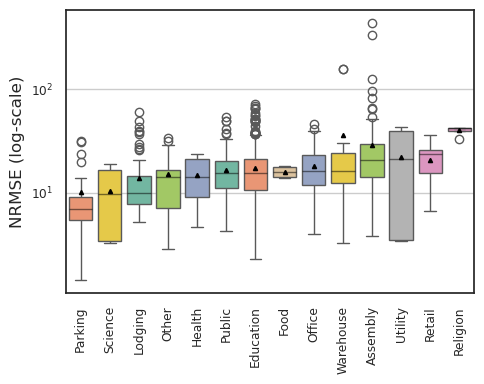

In [17]:
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      #'font.family':'serif',
      'font.size' : 14}
plt.rcParams.update(rc)

#seaborn.set(style='whitegrid')
seaborn.set(style='white', font_scale=1)


plt.figure(figsize=(5, 4))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = test_agg.copy()

test_agg1.NRMSE = test_agg1.NRMSE * 100

test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
test_agg1.building_type = test_agg1.building_type.str.capitalize()

# Find the order
my_order = test_agg1.groupby(by=["building_type"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='building_type', y='NRMSE', fill=True, hue='building_type',
                      order=my_order,                       
                medianprops=dict(color="black", alpha=0.5),
                      showmeans=True,
                meanprops={
                       "markeredgecolor": "black",
                       "markersize": "3",
                'markerfacecolor':'black'},
                      palette='Set2',
                data=test_agg1)
res.tick_params(labelsize=8.8)
res.set_yscale('log')

plt.title(label='')

plt.ylabel("NRMSE (log-scale)")
#plt.ylim(0,120)
plt.xlabel("")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("chronos-bdg-error-building-type-boxplot.pdf", bbox_inches='tight')
plt.show()

In [ ]:
# import seaborn
# import seaborn as sns

# rc = {
#       'axes.facecolor':'white',
#       'axes.grid' : True,
#       'grid.color': '.8',
#       #'font.family':'serif',
#       'font.size' : 12}
# plt.rcParams.update(rc)

# #seaborn.set(style='whitegrid')
# seaborn.set(style='white')


# plt.figure(figsize=(6, 5))
# # date_formater = mdates.DateFormatter('%b, %d')
# # plt.rcParams.update({'font.size': 12})
# # plt.rcParams["font.family"] = "serif"


# test_agg1 = finetuned_agg.copy()

# test_agg1.NRMSE = test_agg1.NRMSE * 100

# test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
# test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
# test_agg1.building_type = test_agg1.building_type.str.capitalize()

# # Find the order
# my_order = test_agg1.groupby(by=["building_type"])["NRMSE"].median().sort_values().index
# print(my_order)

# res = seaborn.boxplot(x='building_type', y='NRMSE', fill=True, hue='building_type',
#                       order=my_order,                       
#                 #medianprops=dict(color="red", alpha=0.9),
#                       #showmeans=True,
#                 # meanprops={
#                 #        "markeredgecolor": "green",
#                 #        "markersize": "4"},
#                 data=test_agg1)


# plt.title(label='')

# plt.ylabel("NRMSE")
# plt.ylim(0,125)
# plt.xlabel("")
# plt.xticks(rotation=90)
# plt.grid(axis='y')
# plt.gcf().tight_layout()
# sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# #plt.savefig("finetuned-bdg-error-building-type-boxplot.pdf", bbox_inches='tight')
# plt.show()

In [28]:
combined.columns

Index(['result_type', 'dataset', 'filename', 'building', 'MSE', 'abs_error',
       'abs_target_sum', 'abs_target_mean', 'seasonal_error', 'MASE', 'MAPE',
       'sMAPE', 'MSIS', 'num_masked_target_values', 'QuantileLoss[0.1]',
       'Coverage[0.1]', 'QuantileLoss[0.2]', 'Coverage[0.2]',
       'QuantileLoss[0.3]', 'Coverage[0.3]', 'QuantileLoss[0.4]',
       'Coverage[0.4]', 'QuantileLoss[0.5]', 'Coverage[0.5]',
       'QuantileLoss[0.6]', 'Coverage[0.6]', 'QuantileLoss[0.7]',
       'Coverage[0.7]', 'QuantileLoss[0.8]', 'Coverage[0.8]',
       'QuantileLoss[0.9]', 'Coverage[0.9]', 'RMSE', 'NRMSE', 'ND',
       'wQuantileLoss[0.1]', 'wQuantileLoss[0.2]', 'wQuantileLoss[0.3]',
       'wQuantileLoss[0.4]', 'wQuantileLoss[0.5]', 'wQuantileLoss[0.6]',
       'wQuantileLoss[0.7]', 'wQuantileLoss[0.8]', 'wQuantileLoss[0.9]',
       'mean_absolute_QuantileLoss', 'mean_wQuantileLoss', 'MAE_Coverage',
       'OWA'],
      dtype='object')

In [67]:
# import seaborn
# import seaborn as sns

# rc = {
#       'axes.facecolor':'white',
#       'axes.grid' : True,
#       'grid.color': '.8',
#       #'font.family':'serif',
#       'font.size' : 14}
# plt.rcParams.update(rc)

# #seaborn.set(style='whitegrid')
# seaborn.set(style='white')


# plt.figure(figsize=(6, 5))
# # date_formater = mdates.DateFormatter('%b, %d')
# # plt.rcParams.update({'font.size': 12})
# # plt.rcParams["font.family"] = "serif"


# test_agg1 = combined.copy()

# test_agg1.NRMSE = test_agg1.NRMSE * 100

# test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
# test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
# test_agg1.building_type = test_agg1.building_type.str.capitalize()

# # Find the order
# my_order = test_agg1[test_agg1.result_type == 'Fine-tuned'].groupby(by=["building_type"])["NRMSE"].median().sort_values().index
# print(my_order)

# res = seaborn.boxplot(x='building_type', y='NRMSE', fill=True, hue='result_type',
#                       order=my_order,                       
#                 medianprops=dict(color="black", alpha=0.5),
#                       showmeans=True,
#                 meanprops={
#                        "markeredgecolor": "black",
#                        "markersize": "3",
#                 'markerfacecolor':'black'},
#                       palette='Set2',
#                 data=test_agg1)


# plt.title(label='')

# plt.ylabel("NRMSE")
# plt.ylim(0,125)
# plt.xlabel("")
# plt.xticks(rotation=90)
# plt.grid(axis='y')
# plt.gcf().tight_layout()
# sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
# plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("bdg-error-building-type-combined-boxplot.pdf", bbox_inches='tight')
# plt.show()

In [31]:
# cumulative erros
# less < 5,
# 5-10
# 15-20
# 20-25
# 25-30
# 30-40
# >40

In [85]:
test_agg1 = combined.copy()
test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
cols = ['result_type', 'building_type', 'NRMSE']
res_agg2 = test_agg1[cols].groupby(['result_type', 'building_type']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})
res_agg2

res_agg2 = pd.DataFrame(res_agg2)
res_agg2

NRMSE
                             median
result_type building_type          
Fine-tuned  assembly       0.244521
            education      0.182651
            food           0.168365
            health         0.180543
            lodging        0.127200
            office         0.193726
            other          0.141732
            parking        0.107105
            public         0.179209
            religion       0.450831
            retail         0.257869
            science        0.110881
            utility        0.210819
            warehouse      0.214591
Zero-shot   assembly       0.291628
            education      0.252529
            food           0.354515
            health         0.243345
            lodging        0.162444
            office         0.285899
            other          0.207212
            parking        0.268820
            public         0.197181
            religion       0.494437
            retail         0.410544
            science        0.137848
            utility        0.260709
            warehouse      0.227780

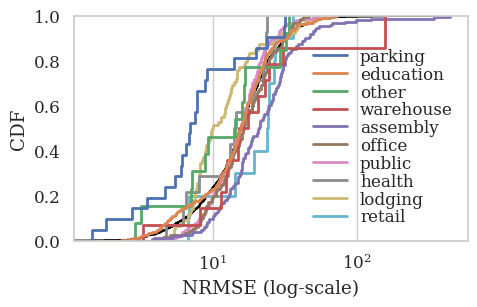

In [66]:
# sns.set()  # crazy big
sns.set_theme(style="whitegrid", font_scale=1.1)

date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
# plt.figure(figsize=(5, 3.3))
fig, ax = plt.subplots()


copy_df = test_agg['NRMSE'].reset_index()
all_df = pd.DataFrame(copy_df['NRMSE'] * 100)
#assembly_df
all_df['cdf'] = all_df.rank(method = 'average', pct = True)
ax_c = seaborn.ecdfplot(data=all_df.sort_values('NRMSE'), x="NRMSE", ax=ax, color='black')
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color = 'black')
# median = all_df.sort_values('NRMSE').quantile(0.5)
# #plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))

copy_df = test_agg.reset_index()
copy_df['NRMSE'] = copy_df['NRMSE'] * 100
copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])

copy_df = copy_df.sort_values('NRMSE')

b_types = [
    'parking', 
           'education', 
    'other',
    'warehouse', 
    #'science', 'utility',
    'assembly', 'office', 'public', 
    'health', 
    'lodging', 'retail',
#       'food', 'religion'
]
copy_df = copy_df[copy_df.building_type.isin(b_types)]
ax_s = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='building_type', ax=ax, lw=2)
ax_s.set_xscale('log')
# sns.move_legend(ax, "lower right", labelspacing=0.2, title='')
sns.move_legend(ax, "lower right", title='', labelspacing=0.05, frameon=False)

plt.title(label='')

plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE (log-scale)")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("chronos-bdg-error-building-type-cdfplot.pdf", bbox_inches='tight')
plt.show()

In [94]:
copy_df.building_type.value_counts()

building_type
education    456
public       190
assembly     149
office       117
lodging       78
parking       21
health        14
warehouse     14
other         13
retail        10
utility        4
science        4
food           4
religion       4
Name: count, dtype: int64

In [11]:
copy_df = test_agg.reset_index()
# copy_df['NRMSE'] = copy_df['NRMSE'] * 100
# copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])

In [37]:
test_agg[test_agg['NRMSE'] > 0.4].sort_values('NRMSE', ascending=False)

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
25,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_assembly_Jerrod,11.515635,132.609853,4.614824,2.596419,0.411613,4.393452,3.237193
24,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_assembly_Jerrod,8.555997,73.205085,2.851412,1.524470,0.347545,3.376229,1.830636
126,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_warehouse_Lorretta,26.921459,724.764952,10.696243,0.808096,0.416424,1.566594,1.222950
125,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_warehouse_Lorretta,29.145423,849.455653,11.802278,0.883911,0.420987,1.557704,1.124059
49,agg_metrics,BDG-2,Rat_clean=2016.csv,Rat_assembly_Jannie,1.011694,1.023524,0.250191,1.120933,0.236915,1.245896,4.526830
46,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_assembly_Jannie,0.828810,0.686927,0.200159,1.095171,0.168138,0.971975,8.019477
65,agg_metrics,BDG-2,Panther_clean=2017.csv,Panther_assembly_David,54.855001,3009.071083,17.425651,0.206027,0.168764,0.816939,0.952359
18,agg_metrics,BDG-2,Bear_clean=2017.csv,Bear_education_Arnold,0.409803,0.167939,0.167108,0.190384,0.211795,0.722307,0.852610
25,agg_metrics,BDG-2,Bear_clean=2017.csv,Bear_education_Santos,6.064373,36.776624,3.078666,0.342325,0.255427,0.685138,0.957455
23,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_education_Santos,5.619677,31.580772,2.812745,0.319020,0.252772,0.665096,0.808884


In [37]:
copy_df = test_agg
copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])
copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
copy_df['site'].value_counts()

site
Rat        539
Fox        265
Bear       169
Panther    105
Name: count, dtype: int64

In [50]:
copy_df = test_agg[test_agg['NRMSE'] > 0.5].sort_values('NRMSE', ascending=False)
copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])

In [51]:
grouped = copy_df.groupby('site')

In [52]:
for site in copy_df.site.unique():
    print(site, grouped.get_group(site).building.unique().shape)

Fox (5,)
Rat (6,)
Panther (2,)
Bear (4,)


In [53]:
grouped = copy_df.groupby('building_type')

In [54]:
grouped.head()

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL,site,building_type
25,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_assembly_Jerrod,11.515635,132.609853,4.614824,2.596419,0.411613,4.393452,3.237193,Fox,assembly
24,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_assembly_Jerrod,8.555997,73.205085,2.851412,1.524470,0.347545,3.376229,1.830636,Fox,assembly
126,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_warehouse_Lorretta,26.921459,724.764952,10.696243,0.808096,0.416424,1.566594,1.222950,Fox,warehouse
125,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_warehouse_Lorretta,29.145423,849.455653,11.802278,0.883911,0.420987,1.557704,1.124059,Fox,warehouse
49,agg_metrics,BDG-2,Rat_clean=2016.csv,Rat_assembly_Jannie,1.011694,1.023524,0.250191,1.120933,0.236915,1.245896,4.526830,Rat,assembly
46,agg_metrics,BDG-2,Rat_clean=2017.csv,Rat_assembly_Jannie,0.828810,0.686927,0.200159,1.095171,0.168138,0.971975,8.019477,Rat,assembly
65,agg_metrics,BDG-2,Panther_clean=2017.csv,Panther_assembly_David,54.855001,3009.071083,17.425651,0.206027,0.168764,0.816939,0.952359,Panther,assembly
18,agg_metrics,BDG-2,Bear_clean=2017.csv,Bear_education_Arnold,0.409803,0.167939,0.167108,0.190384,0.211795,0.722307,0.852610,Bear,education
25,agg_metrics,BDG-2,Bear_clean=2017.csv,Bear_education_Santos,6.064373,36.776624,3.078666,0.342325,0.255427,0.685138,0.957455,Bear,education
23,agg_metrics,BDG-2,Bear_clean=2016.csv,Bear_education_Santos,5.619677,31.580772,2.812745,0.319020,0.252772,0.665096,0.808884,Bear,education


In [55]:
for type in copy_df.building_type.unique():
    print(type, grouped.get_group(type).shape)

assembly (10, 13)
warehouse (2, 13)
education (12, 13)
lodging (1, 13)
public (1, 13)


In [28]:
# assembly_df = pd.DataFrame(test_agg[test_agg['building_type'] == 'assembly']['NRMSE'] * 100)
# #assembly_df
# assembly_df['cdf'] = assembly_df.rank(method = 'average', pct = True)
# assembly_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True)

In [68]:
# assembly_df = pd.DataFrame(test_agg[test_agg['building_type'] == 'education']['NRMSE'] * 100)
# #assembly_df
# # assembly_df['cdf'] = assembly_df.rank(method = 'average', pct = True)
# # assembly_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True)
# out = pd.cut(assembly_df['NRMSE'], 10, include_lowest=True)
# ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
# ax.set_xticklabels([str(c.left) + ' to ' + str(c.right) for c in out.cat.categories])
# plt.show()


In [69]:
# bins= [5, 10, 15, 20, 25, 30, 40]
# plt.hist(assembly_df['NRMSE'].values, bins=bins, edgecolor="k")
# plt.xticks(bins)

In [70]:
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"
# fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 6))

# # Rename the axes for ease of use
# ax11 = axes[0][0]
# ax12 = axes[0][1]
# ax13 = axes[0][2]
# ax14 = axes[0][3]
# ax15 = axes[0][4]
# ax16 = axes[0][5]
# ax17 = axes[0][6]
# ax21 = axes[1][0]
# ax22 = axes[1][1]
# ax23 = axes[1][2]
# ax24 = axes[1][3]
# ax25 = axes[1][4]
# ax26 = axes[1][5]
# ax27 = axes[1][6]
# ax_list = [ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax21, ax22, ax23, ax24, ax25, ax26, ax27]

# for type, ax in zip(test_agg.building_type.unique(), ax_list):
#     assembly_df = pd.DataFrame(test_agg[test_agg['building_type'] == type]['NRMSE'] * 100)
#     #assembly_df
#     assembly_df['cdf'] = assembly_df.rank(method = 'average', pct = True)
#     assembly_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', ax = ax, legend=False)
#     #res_agg2.mul(100).round(2).plot.bar(ax = ax, legend=False)
#     #print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))
    
#     ax.set_ylabel("CDF")
#     ax.set_xlabel(type.capitalize()+'-'+'NRMSE')
# plt.gcf().tight_layout()
#     #plt.legend()
# #plt.subplots_adjust(wspace=0.05, hspace=0)
# #plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
# plt.show()

In [71]:
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"
# fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 6))

# # Rename the axes for ease of use
# ax11 = axes[0][0]
# ax12 = axes[0][1]
# ax13 = axes[0][2]
# ax14 = axes[0][3]
# ax15 = axes[0][4]
# ax16 = axes[0][5]
# ax17 = axes[0][6]
# ax21 = axes[1][0]
# ax22 = axes[1][1]
# ax23 = axes[1][2]
# ax24 = axes[1][3]
# ax25 = axes[1][4]
# ax26 = axes[1][5]
# ax27 = axes[1][6]
# ax_list = [ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax21, ax22, ax23, ax24, ax25, ax26, ax27]

# for type, ax in zip(test_agg.building_type.unique(), ax_list):
#     assembly_df = pd.DataFrame(test_agg[test_agg['building_type'] == type]['NRMSE'] * 100)
#     #assembly_df
# #assembly_df
# # assembly_df['cdf'] = assembly_df.rank(method = 'average', pct = True)
# # assembly_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True)
#     bins= [0, 5, 10, 15, 20, 25, 30, 40, 50]
#     ax.hist(assembly_df['NRMSE'].values, bins=bins, edgecolor="k")
#     #ax.xticks(bins)


#     #res_agg2.mul(100).round(2).plot.bar(ax = ax, legend=False)
#     #print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))
    
#     ax.set_ylabel("count")
#     ax.set_xlabel(type.capitalize())
# plt.gcf().tight_layout()
#     #plt.legend()
# #plt.subplots_adjust(wspace=0.05, hspace=0.5)
# #plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
# plt.show()

In [72]:
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# # Rename the axes for ease of use
# ax11 = axes[0]
# ax12 = axes[1]
# ax13 = axes[2]
# ax14 = axes[3]

# ax_list = [ax11, ax12, ax13, ax14,]

# for site, ax in zip(test_agg.site.unique(), ax_list):
#     assembly_df = pd.DataFrame(test_agg[test_agg['site'] == site]['NRMSE'] * 100)
#     #assembly_df
#     assembly_df['cdf'] = assembly_df.rank(method = 'average', pct = True)
#     assembly_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', ax = ax, legend=False)
#     #res_agg2.mul(100).round(2).plot.bar(ax = ax, legend=False)
#     #print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))
    
#     ax.set_ylabel("CDF")
#     ax.set_xlabel(site.capitalize()+'-'+'NRMSE')
# plt.gcf().tight_layout()
#     #plt.legend()
# #plt.subplots_adjust(wspace=0.05, hspace=0)
# #plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
# plt.show()

In [74]:
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

# # Rename the axes for ease of use
# ax11 = axes[0]
# ax12 = axes[1]
# ax13 = axes[2]
# ax14 = axes[3]

# ax_list = [ax11, ax12, ax13, ax14,]

# for site, ax in zip(test_agg.site.unique(), ax_list):
#     assembly_df = pd.DataFrame(test_agg[test_agg['site'] == site]['NRMSE'] * 100)
#     #assembly_df
#     # assembly_df['cdf'] = assembly_df.rank(method = 'average', pct = True)
#     # assembly_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', ax = ax, legend=False)
#     #res_agg2.mul(100).round(2).plot.bar(ax = ax, legend=False)
#     #print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))
#     bins= [0, 5, 10, 15, 20, 25, 30, 40, 50]
#     ax.hist(assembly_df['NRMSE'].values, bins=bins, edgecolor="k")
    
#     ax.set_ylabel("count")
#     ax.set_xlabel(site.capitalize())
# plt.gcf().tight_layout()
#     #plt.legend()
# #plt.subplots_adjust(wspace=0.05, hspace=0)
# #plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
# plt.show()

In [32]:
# test_agg1 = combined.copy()
# test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
# test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])

In [33]:
# cols = ['result_type', 'building_type', 'NRMSE']
# res_agg2 = test_agg1[cols].groupby(['result_type', 'building_type']).agg( {#'sMAPE': ['mean', 'std', 'median'],
#                                                                     #'NRMSE': ['mean', 'std', 'median']})
#     'NRMSE': ['median']})
# res_agg2

NRMSE
                             median
result_type building_type          
Fine-tuned  assembly       0.244521
            education      0.182651
            food           0.168365
            health         0.180543
            lodging        0.127200
            office         0.193726
            other          0.141732
            parking        0.107105
            public         0.179209
            religion       0.450831
            retail         0.257869
            science        0.110881
            utility        0.210819
            warehouse      0.214591
Zero-shot   assembly       0.291628
            education      0.252529
            food           0.354515
            health         0.243345
            lodging        0.162444
            office         0.285899
            other          0.207212
            parking        0.268820
            public         0.197181
            religion       0.494437
            retail         0.410544
            science        0.137848
            utility        0.260709
            warehouse      0.227780

In [41]:
res_agg2 = pd.DataFrame(res_agg2).reset_index()
res_agg2

,index,result_type,building_type,NRMSE
,,,,median
0,0,Fine-tuned,assembly,0.244521
1,1,Fine-tuned,education,0.182651
2,2,Fine-tuned,food,0.168365
3,3,Fine-tuned,health,0.180543
4,4,Fine-tuned,lodging,0.127200
5,5,Fine-tuned,office,0.193726
6,6,Fine-tuned,other,0.141732
7,7,Fine-tuned,parking,0.107105
8,8,Fine-tuned,public,0.179209


Index(['Panther', 'Fox', 'Bear', 'Rat'], dtype='object', name='site')


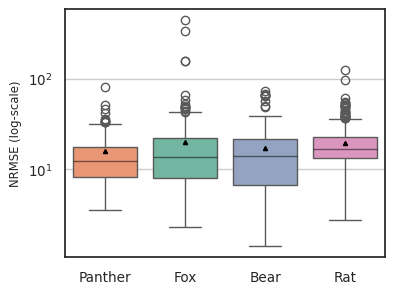

In [19]:
import seaborn
import seaborn as sns

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      #'font.family':'serif',
      'font.size' : 14}
plt.rcParams.update(rc)

#sns.set_theme()
seaborn.set(style='white', font_scale=0.7)

plt.figure(figsize=(4, 3))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = test_agg.copy()
#test_agg1.building_type = test_agg1.building_type.str.capitalize()
test_agg1.NRMSE = test_agg1.NRMSE * 100
test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
test_agg1.site = test_agg1.site.str.capitalize()


# Find the order
my_order = test_agg1.groupby(by=["site"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='site', y='NRMSE', fill=True, hue='site', order=my_order,                       
                medianprops=dict(color="black", alpha=0.5),
                      showmeans=True,
                meanprops={
                       "markeredgecolor": "black",
                       "markersize": "3",
                'markerfacecolor':'black'},
                      palette='Set2',
                data=test_agg1)
res.tick_params(labelsize=9.8)
res.set_yscale('log') 
plt.title(label='')

plt.ylabel("NRMSE (log-scale)")
# plt.ylim(0,120)
plt.xlabel("")
#plt.xticks(rotation=90)
#plt.grid(True)
plt.grid(axis='y')

plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("chronos-bdg-error-site-boxplot.pdf", bbox_inches='tight')
plt.show()

In [75]:
# import seaborn
# import seaborn as sns

# rc = {
#       'axes.facecolor':'white',
#       'axes.grid' : True,
#       'grid.color': '.8',
#       'font.family':'serif',
#       'font.size' : 12}
# plt.rcParams.update(rc)

# #sns.set_theme()
# seaborn.set(style='white')

# plt.figure(figsize=(6, 4))
# # date_formater = mdates.DateFormatter('%b, %d')
# # plt.rcParams.update({'font.size': 12})
# # plt.rcParams["font.family"] = "serif"


# test_agg1 = finetuned_agg.copy()
# test_agg1.building_type = test_agg1.building_type.str.capitalize()
# test_agg1.NRMSE = test_agg1.NRMSE * 100

# # Find the order
# my_order = test_agg1.groupby(by=["site"])["NRMSE"].median().sort_values().index
# print(my_order)

# res = seaborn.boxplot(x='site', y='NRMSE', fill=True, hue='site', order=my_order,                       
#                 #medianprops=dict(color="red", alpha=0.9),
#                       #showmeans=True,
#                 # meanprops={
#                 #        "markeredgecolor": "green",
#                 #        "markersize": "4"},
#                 data=test_agg1)


# plt.title(label='')

# plt.ylabel("NRMSE")
# plt.ylim(0,125)
# plt.xlabel("")
# #plt.xticks(rotation=90)
# #plt.grid(True)
# plt.grid(axis='y')

# plt.gcf().tight_layout()
# sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("finetuned-bdg-error-site-boxplot.pdf", bbox_inches='tight')
# plt.show()

In [55]:
test_agg1 = combined.copy()
test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
cols = ['result_type', 'site', 'NRMSE']
res_agg2 = test_agg1[cols].groupby(['result_type', 'site']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})
res_agg2

NRMSE
                       median
result_type site             
Fine-tuned  Bear     0.154964
            Fox      0.159296
            Panther  0.143814
            Rat      0.211261
Zero-shot   Bear     0.273150
            Fox      0.239225
            Panther  0.207740
            Rat      0.246127

In [ ]:
# test_agg[test_agg.NRMSE > 0.8]

In [ ]:
# test_agg.groupby(by=["building_type"])["NRMSE"].median().sort_values().index

In [ ]:
# test_agg.site.value_counts()

In [ ]:
# plt.figure(figsize=(12, 3))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"

# res_agg2 = test_agg[['site', 'NRMSE']].groupby(['site']).agg( { 'NRMSE': ['median']})
# #res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
# #res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
# res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]).plot.bar(legend=False)
# print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))

# plt.ylabel("NRMSE")
# plt.xlabel('')
# plt.gcf().tight_layout()
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("bdg-nrmse-site.pdf", bbox_inches='tight')
# plt.show()

In [ ]:
# plt.figure(figsize=(6, 6))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"
# grouped = test_agg[['site', 'NRMSE']].reset_index().groupby(['site'])

# df2 = pd.DataFrame({col[0]:vals['NRMSE'] for col,vals in grouped}).mul(100).round(2)

# meds = df2.median()
# meds.sort_values(ascending=False, inplace=Tru
# df2 = df2[meds.index]
# print(meds.sort_values())
# #test_agg.boxplot(column=['NRMSE'], by='building_type')
# df2.boxplot()
# plt.title(label='')`d
# plt.ylabel("NRMSE")
# plt.xticks(rotation=90)
# plt.grid(False)
# plt.gcf().tight_layout()
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# plt.savefig("bdg-error-site-boxplot.pdf", bbox_inches='tight')
# plt.show()


In [ ]:
files = glob.glob(f'/home/user/energygpt/lagllama/forecasts_finetuned/BDG-2-50epoch/*.csv')
forecasts = []
b_count = 0
for f in files:            
    df = pd.read_csv(f)
    print(f, df.shape)
    df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
    forecasts.append(df)                
    b_count += df.shape[0]
    
forecasts_df = pd.concat(forecasts)

In [ ]:
forecasts_df.shape

In [ ]:
forecasts_df.groupby(['filename', 'building']).count()

In [ ]:
forecasts_df['timestamp'] = pd.to_datetime(forecasts_df.timestamp)
forecasts_df['date'] = forecasts_df.timestamp.dt.date
forecasts_df['month'] = forecasts_df.timestamp.dt.month
forecasts_df['dayofweek'] = forecasts_df.timestamp.dt.dayofweek
forecasts_df

In [ ]:
forecasts_df.month.value_counts()

In [ ]:
forecasts_df.dayofweek.value_counts()

In [ ]:
forecasts_df

In [ ]:
forecasts_df.describe()

In [ ]:
def nrmse_fun(f1):
    return np.sqrt(m.mse(f1.y_true, f1.y_pred)) / f1.y_true.mean()
    
# nrmse_date = forecasts_df[['building', 'filename', 'month', 'date', 'y_true', 'y_pred']].groupby(['filename', 'building', 'month']).apply(nrmse_fun)
# nrmse_date

nrmse_month = forecasts_df[['building', 'filename', 'month', 'date', 'y_true', 'y_pred']].groupby(['filename', 'building', 'month']).apply(nrmse_fun)
nrmse_date

In [ ]:
nrmse_month_df = pd.DataFrame(nrmse_month).reset_index()
nrmse_month_df

In [ ]:
nrmse_month_df.describe()

In [ ]:
# test_agg.NRMSE.describe()

In [ ]:
# nrmse_date_df.describe()

In [ ]:
nrmse_month_df = pd.DataFrame(nrmse_month).reset_index()
#nrmse_month_df['date'] = pd.to_datetime(nrmse_month_df.date)
#nrmse_month_df['month'] = nrmse_month_df.date.dt.month
#nrmse_month_df['dayofweek'] = nrmse_month_df.date.dt.dayofweek
nrmse_month_df.columns = ['filename', 'building', 'month', 'NRMSE']
nrmse_month_df

In [ ]:
nrmse_month_df[nrmse_month_df.NRMSE > 2]

In [ ]:
nrmse_month_df.describe()

In [ ]:
import seaborn
import seaborn as sns

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'serif',
      'font.size' : 12}
plt.rcParams.update(rc)

#sns.set_theme()
seaborn.set(style='white')

plt.figure(figsize=(6, 4))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = nrmse_month_df.copy()
test_agg1.NRMSE = test_agg1.NRMSE * 100

# Find the order
my_order = test_agg1.groupby(by=["month"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='month', y='NRMSE', fill=False, order=my_order,                       
                medianprops=dict(color="red", alpha=0.9),
                      #showmeans=True,
                # meanprops={
                #        "markeredgecolor": "green",
                #        "markersize": "4"},
                data=test_agg1)


plt.title(label='')

plt.ylabel("NRMSE")
plt.ylim(0,125)
plt.xlabel("")
#plt.xticks(rotation=90)
#plt.grid(True)
plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("bdg-error-month-boxplot.pdf", bbox_inches='tight')
plt.show()

In [ ]:
## old

In [ ]:
def nrmse_fun(f1):
    return np.sqrt(m.mse(f1.y_true, f1.y_pred)) / f1.y_true.mean()
    
nrmse_month = forecasts_df.groupby(['month']).apply(nrmse_fun)

In [ ]:
import seaborn
import seaborn as sns

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'serif',
      'font.size' : 12}
plt.rcParams.update(rc)

#sns.set_theme()
seaborn.set(style='white')

plt.figure(figsize=(6, 4))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = test_agg.copy()
test_agg1.building_type = test_agg1.building_type.str.capitalize()
test_agg1.NRMSE = test_agg1.NRMSE * 100

# Find the order
my_order = test_agg1.groupby(by=["site"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='site', y='NRMSE', fill=False, order=my_order,                       
                medianprops=dict(color="red", alpha=0.9),
                      #showmeans=True,
                # meanprops={
                #        "markeredgecolor": "green",
                #        "markersize": "4"},
                data=test_agg1)


plt.title(label='')

plt.ylabel("NRMSE")
plt.ylim(0,80)
plt.xlabel("")
#plt.xticks(rotation=90)
#plt.grid(True)
plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("bdg-error-site-boxplot.pdf", bbox_inches='tight')
plt.show()

In [ ]:
nrmse_month

In [ ]:
def nrmse_fun(f1):
    return np.sqrt(m.mse(f1.y_true, f1.y_pred)) / f1.y_true.mean()
    
nrmse = forecasts_df.groupby(['filename', 'building']).apply(nrmse_fun)

In [ ]:
nrmse

In [ ]:
f = pd.read_csv('/home/user/energygpt/lagllama/forecasts_finetuned/BDG-2-50epoch/Fox_clean=2017.csv')
#f1 = f[ (f.building == 'Fox_education_Lilly') & (f.filename == '/home/user/BuildingsBenchNREL/BuildingsBenchData/BuildingsBench/BDG-2/Fox_clean=2017.csv')]
#f1
f.shape

In [ ]:
f.building.value_counts()

In [ ]:
def nrmse(f1):
    return np.sqrt(m.mse(f1.y_true, f1.y_pred)) / f1.y_true.mean()
    
f.groupby(['filename', 'building']).apply(nrmse)

In [ ]:
# f1['timestamp'] = pd.to_datetime(f1.timestamp)
# f1['date'] = f1.timestamp.dt.datek
# f1

In [ ]:
# mse_list = []
# mse_sum =0 
# i= 0
# for ix, g in f1.groupby(['date']):    
#     mse_list.append(m.mse(g.y_true, g.y_pred))
#     mse_sum += m.mse(g.y_true, g.y_pred)
#     i+=1
    
# np.sqrt(mse_sum/i) / f1.y_true.mean()

In [ ]:
ix

In [ ]:
import gluonts.evaluation.metrics as m

In [ ]:
np.sqrt(m.mse(f1.y_true, f1.y_pred)) / f1.y_true.mean()

In [ ]:
root_mean_squared_error(f1.y_true, f1.y_pred)

#"        nrmse = rmse / (data.y_true.mean())\n",

In [ ]:
(test1.MSE / f1.y_true.mean())

In [ ]:
f.filename[0]

In [ ]:
test_ts['month'] = pd.to_datetime(test_ts.forecast_start).dt.month

In [ ]:
def get_season(m):
  x = m%12 // 3 + 1
  if x == 1:
    season = "Winter"
  if x == 2:
    season = "Spring"
  if x == 3:
    season = "Summer"
  if x == 4:
    season = "Autumn"
  return season

In [ ]:
test_ts['season'] = test_ts['month'].apply(get_season)

In [ ]:
test_ts.month.value_counts()

In [ ]:
test_ts.season.value_counts()

In [ ]:
import seaborn
import seaborn as sns

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'serif',
      'font.size' : 12}
plt.rcParams.update(rc)

#sns.set_theme()
seaborn.set(style='white')

plt.figure(figsize=(6, 4))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = test_ts.copy()
test_agg1.building_type = test_agg1.building_type.str.capitalize()
test_agg1.sMAPE = test_agg1.sMAPE * 100

# Find the order
my_order = test_agg1.groupby(by=["site"])["sMAPE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='site', y='sMAPE', fill=False, order=my_order,                       
                medianprops=dict(color="red", alpha=0.9),
                      #showmeans=True,
                # meanprops={
                #        "markeredgecolor": "green",
                #        "markersize": "4"},
                data=test_agg1)


plt.title(label='')

plt.ylabel("sMAPE")
#plt.ylim(0,80)
plt.xlabel("")
#plt.xticks(rotation=90)
#plt.grid(True)
plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("bdg-error-site-boxplot.pdf", bbox_inches='tight')
plt.show()

In [ ]:
test_ts.columns

In [ ]:
plt.figure(figsize=(12, 3))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "serif"


res_agg2 = test_ts[['month', 'sMAPE']].groupby(['month']).agg( { 'sMAPE': ['median']})
#res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
#res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2).plot.bar(legend=False)
print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))

plt.ylabel("sMAPE")
plt.xlabel('month')
plt.gcf().tight_layout()
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
#plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(12, 3))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "serif"


res_agg2 = test_ts[['season', 'sMAPE']].groupby(['season']).agg( { 'sMAPE': ['median']})
#res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
#res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
res_agg2.mul(100).round(2).plot.bar(legend=False)
print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))

plt.ylabel("sMAPE")
plt.xlabel('season')
plt.gcf().tight_layout()
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
#plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
plt.show()

In [ ]:
#plt.figure(figsize=(12, 3))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "serif"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Rename the axes for ease of use
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]
ax_list = [ax11, ax12, ax21, ax22]

for site, ax in zip(test_ts.site.unique(), ax_list):
    ts_site = test_ts[test_ts.site == site]
    res_agg2 = ts_site[['month', 'sMAPE']].groupby(['month']).agg( { 'sMAPE': ['median']})
    #res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
    #res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
    res_agg2.mul(100).round(2).plot.bar(ax = ax, legend=False)
    #print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))
    
    ax.set_ylabel("sMAPE")
    ax.set_xlabel(site)
plt.gcf().tight_layout()
    #plt.legend()
#plt.subplots_adjust(wspace=0.05, hspace=0)
#plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
plt.show()
    

In [ ]:
#plt.figure(figsize=(12, 3))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "serif"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Rename the axes for ease of use
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]
ax_list = [ax11, ax12, ax21, ax22]

for site, ax in zip(test_ts.site.unique(), ax_list):
    ts_site = test_ts[test_ts.site == site]
    res_agg2 = ts_site[['season', 'sMAPE']].groupby(['season']).agg( { 'sMAPE': ['median']})
    #res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
    #res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
    res_agg2.mul(100).round(2).plot.bar(ax = ax, legend=False)
    #print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))
    
    ax.set_ylabel("sMAPE")
    ax.set_xlabel(site)
plt.gcf().tight_layout()
    #plt.legend()
#plt.subplots_adjust(wspace=0.05, hspace=0)
#plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
plt.show()
    

In [ ]:
#plt.figure(figsize=(12, 3))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "serif"
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 6))

# Rename the axes for ease of use
ax11 = axes[0][0]
ax12 = axes[0][1]
ax13 = axes[0][2]
ax14 = axes[0][3]
ax15 = axes[0][4]
ax16 = axes[0][5]
ax17 = axes[0][6]
ax21 = axes[1][0]
ax22 = axes[1][1]
ax23 = axes[1][2]
ax24 = axes[1][3]
ax25 = axes[1][4]
ax26 = axes[1][5]
ax27 = axes[1][6]
ax_list = [ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax21, ax22, ax23, ax24, ax25, ax26, ax27]

for type, ax in zip(test_ts.building_type.unique(), ax_list):
    ts_site = test_ts[test_ts.building_type == type]
    res_agg2 = ts_site[['month', 'sMAPE']].groupby(['month']).agg({'sMAPE': ['median']})
    #res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
    #res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
    res_agg2.mul(100).round(2).plot.bar(ax = ax, legend=False)
    #print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))
    
    ax.set_ylabel("sMAPE")
    ax.set_xlabel(type)
plt.gcf().tight_layout()
    #plt.legend()
#plt.subplots_adjust(wspace=0.05, hspace=0)
#plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
plt.show()
    

In [ ]:
#plt.figure(figsize=(12, 3))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "serif"
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 6))

# Rename the axes for ease of use
ax11 = axes[0][0]
ax12 = axes[0][1]
ax13 = axes[0][2]
ax14 = axes[0][3]
ax15 = axes[0][4]
ax16 = axes[0][5]
ax17 = axes[0][6]
ax21 = axes[1][0]
ax22 = axes[1][1]
ax23 = axes[1][2]
ax24 = axes[1][3]
ax25 = axes[1][4]
ax26 = axes[1][5]
ax27 = axes[1][6]
ax_list = [ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax21, ax22, ax23, ax24, ax25, ax26, ax27]

for type, ax in zip(test_ts.building_type.unique(), ax_list):
    ts_site = test_ts[test_ts.building_type == type]
    res_agg2 = ts_site[['season', 'sMAPE']].groupby(['season']).agg({'sMAPE': ['median']})
    #res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
    #res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
    res_agg2.mul(100).round(2).plot.bar(ax = ax, legend=False)
    #print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))
    
    ax.set_ylabel("sMAPE")
    ax.set_xlabel(type)
plt.gcf().tight_layout()
    #plt.legend()
#plt.subplots_adjust(wspace=0.05, hspace=0)
#plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
plt.show()
    

In [ ]:
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "serif"
fig, axes = plt.subplots(nrows=4, ncols=14, figsize=(20, 6))
for i, site in enumerate(test_ts.site.unique()):
    ts_site = test_ts[test_ts.site == site]
    for j, type in enumerate(sorted(ts_site.building_type.unique())):
        ts_type = ts_site[ts_site.building_type == type]
        res_agg2 = ts_type[['month', 'sMAPE']].groupby(['month']).agg({'sMAPE': ['median']})
        #res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
        #res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
        res_agg2.mul(100).round(2).plot.bar(ax = axes[i][j], legend=False)
        #print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))
        axes[i][j].set_ylabel("sMAPE")
        axes[i][j].set_xlabel(site + '-' + type)
plt.gcf().tight_layout()
fig.delaxes(axes[0,-1])
fig.delaxes(axes[0,-2])
fig.delaxes(axes[0,-3])
fig.delaxes(axes[1,-1])
fig.delaxes(axes[1,-2])
fig.delaxes(axes[1,-3])
fig.delaxes(axes[1,-4])
fig.delaxes(axes[1,-5])
fig.delaxes(axes[1,-6])
fig.delaxes(axes[1,-7])
fig.delaxes(axes[2,-1])
fig.delaxes(axes[2,-2])
fig.delaxes(axes[3,-1])
fig.delaxes(axes[3,-2])
fig.delaxes(axes[3,-3])
fig.delaxes(axes[3,-4])
fig.delaxes(axes[3,-5])
fig.delaxes(axes[3,-6])
fig.delaxes(axes[3,-7])
    #plt.legend()
#plt.subplots_adjust(wspace=0.05, hspace=0)
#plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
plt.plot()

In [ ]:
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "serif"
fig, axes = plt.subplots(nrows=4, ncols=14, figsize=(25, 10))
for i, site in enumerate(test_ts.site.unique()):
    ts_site = test_ts[test_ts.site == site]
    for j, type in enumerate(sorted(ts_site.building_type.unique())):
        ts_type = ts_site[ts_site.building_type == type]
        res_agg2 = ts_type[['season', 'sMAPE']].groupby(['season']).agg({'sMAPE': ['median']})
        #res_agg2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset.csv')
        #res_agg2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset.tex')
        res_agg2.mul(100).round(2).plot.bar(ax = axes[i][j], legend=False)
        #print(res_agg2.mul(100).round(2).sort_values(by=res_agg2.columns[0]))
        axes[i][j].set_ylabel("sMAPE")
        axes[i][j].set_xlabel(site + '-' + type)
plt.gcf().tight_layout()
fig.delaxes(axes[0,-1])
fig.delaxes(axes[0,-2])
fig.delaxes(axes[0,-3])
fig.delaxes(axes[1,-1])
fig.delaxes(axes[1,-2])
fig.delaxes(axes[1,-3])
fig.delaxes(axes[1,-4])
fig.delaxes(axes[1,-5])
fig.delaxes(axes[1,-6])
fig.delaxes(axes[1,-7])
fig.delaxes(axes[2,-1])
fig.delaxes(axes[2,-2])
fig.delaxes(axes[3,-1])
fig.delaxes(axes[3,-2])
fig.delaxes(axes[3,-3])
fig.delaxes(axes[3,-4])
fig.delaxes(axes[3,-5])
fig.delaxes(axes[3,-6])
fig.delaxes(axes[3,-7])
    #plt.legend()
#plt.subplots_adjust(wspace=0.05, hspace=0)
#plt.savefig("bdg-nrmse-building-type.pdf", bbox_inches='tight')
plt.plot()

In [ ]:
result_type = 'ts_metrics'
test_ts = load_results(datasets, result_type)
print(test_ts.shape)

result_type = 'ts_metrics'
finetuned_ts = load_results(datasets, result_type)
print(finetuned_ts.shape)

In [ ]:
test_ts.columns

In [ ]:
finetuned_ts

In [ ]:
!pwd

In [ ]:
combined_ts = pd.concat([test_ts, finetuned_ts])

combined_ts.result_type = combined_ts.result_type.str.replace('test_ts_metrics', 'Zero-shot')
combined_ts.result_type = combined_ts.result_type.str.replace('finetuned_ts_metrics', 'Fine-tuned')

cols = ['result_type', 'sMAPE', 'MSE']
res_ts1 = combined_ts[cols].groupby(['result_type']).agg( {'sMAPE': ['mean', 'std', 'median'],
                                                          'MSE': ['mean', 'std', 'median']})

res_ts1.mul(100).round(2).to_csv('./results_finetuned/commercial_ts.csv')
res_ts1.mul(100).round(2).to_latex('./results_finetuned/commercial_ts.tex')
res_ts1.mul(100).round(2)

In [ ]:
#combined = pd.concat([test_agg, finetuned_agg])
cols = ['result_type', 'dataset', 'sMAPE', 'MSE']
res_ts2 = combined_ts[cols].groupby(['result_type', 'dataset']).agg( {'sMAPE': ['mean', 'std', 'median'],
                                                                      'MSE': ['mean', 'std', 'median']})

res_ts2.mul(100).round(2).to_csv('./results_finetuned/commercial_by_dataset_ts.csv')
res_ts2.mul(100).round(2).to_latex('./results_finetuned/commercial_by_dataset_ts.tex')
res_ts2.mul(100).round(2)

In [ ]:
#combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')

In [ ]:
# pd.concat([smape_d4.T, nrmse_d4.T], axis=0)

In [ ]:
# test_agg[['sMAPE', 'NRMSE']].mean()
# test_agg[['sMAPE', 'NRMSE']].median()

# # smape_d1 = finetuned_agg[cols].groupby(['dataset']).mean()
# # smape_d2 = finetuned_agg[cols].groupby(['dataset']).std()
# # smape_d3 = finetuned_agg[cols].groupby(['dataset']).median()
# # smape_d4 = pd.concat([smape_d1, smape_d2, smape_d3], axis=1)


In [ ]:
# # cols = ['dataset', 'filename', 'sMAPE']
# # finetuned_agg[cols].groupby(['dataset', 'filename']).mean()

# cols = ['dataset', 'sMAPE']
# smape_d1 = finetuned_agg[cols].groupby(['dataset']).mean()
# smape_d2 = finetuned_agg[cols].groupby(['dataset']).std()
# smape_d3 = finetuned_agg[cols].groupby(['dataset']).median()
# smape_d4 = pd.concat([smape_d1, smape_d2, smape_d3], axis=1)
# #smape_d4.columns = ['sMAPE_mean', 'sMAPE_std', 'sMAPE_median']
# smape_d4

In [ ]:
# smape_d4.columns

In [ ]:
# cols = ['dataset', 'NRMSE']
# nrmse_d1 = finetuned_agg[cols].groupby(['dataset']).mean()
# nrmse_d2 = finetuned_agg[cols].groupby(['dataset']).std()
# nrmse_d3 = finetuned_agg[cols].groupby(['dataset']).median()
# nrmse_d4 = pd.concat([nrmse_d1, nrmse_d2, nrmse_d3], axis=1)
# #nrmse_d4.columns = ['NRMSE_mean', 'NRMSE_std', 'NRMSE_median']
# nrmse_d4

In [ ]:
# pd.concat([smape_d4, nrmse_d4], axis=1)

In [ ]:
# d1

In [ ]:
# d2

In [ ]:
# pd.concat([d1, d2, d3], axis=1)

In [ ]:
# agg_results = {
#     'sMAPE_mean': test_agg.sMAPE.mean(),
#     'sMAPE_std': test_agg.sMAPE.std(),
#     'sMAPE_median': test_agg.sMAPE.median()
# }

# test_agg_results_df = pd.DataFrame([agg_results])
# agg_results_df

In [ ]:
# result_type = 'test_agg_metrics'
# #'test_agg'

# results = []
# for dataset in datasets:
#     print(dataset)
#     files = glob.glob(f'/home/user/energygpt/lagllama/results_finetuned/{dataset}/{result_type}*.csv')
#     for f in files:
#         print(f)
#         df = pd.read_csv(f)
#         df.insert(0, 'dataset', dataset)
#         df.insert(0, 'result_type', result_type)
#         df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
#         results.append(df)    
        
# results_df = pd.concat(results)
# results_df.head()

In [ ]:
# results_df.filename.value_counts()

In [ ]:
# results_df.building.value_counts()

In [ ]:
# results_df['filename'] = results_df.filename.apply(lambda s: os.path.basename(s))

In [ ]:
# #results_df.filename[0]
# results_df.filename.to_list()